<a href="https://colab.research.google.com/github/JatinKrRana/AlmaBetter-Capstone_Project_1/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [483]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [484]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [485]:
# Load Dataset
play_store_df = pd.read_csv('/content/drive/MyDrive/csv data files/Play Store Data.csv')
user_review_df = pd.read_csv('/content/drive/MyDrive/csv data files/User Reviews.csv')

### Dataset First View

In [486]:
# Dataset First Look
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [487]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [488]:
# Dataset Rows & Columns count
play_store_df_rows = play_store_df.shape[0]
play_store_df_columns = play_store_df.shape[1]
print(f"Number of rows in play_store_df is {play_store_df_rows} and columns is {play_store_df_columns}.")

Number of rows in play_store_df is 10841 and columns is 13.


In [489]:
user_review_df_rows = user_review_df.shape[0]
user_review_df_columns = user_review_df.shape[1]
print(f"Number of rows in user_review_df is {user_review_df_rows} and columns is {user_review_df_columns}.")

Number of rows in user_review_df is 64295 and columns is 5.


### Dataset Information

In [490]:
# Dataset Info
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [491]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [492]:
# Dataset Duplicate Value Count
def duplicate_value_count(data):
  list1 = []
  duplicate_values = 0
  for i in data:
    if i in list1:
      duplicate_values += 1
    else:
      list1.append(i)
  return duplicate_values


In [493]:
duplicate_value_count(play_store_df['App'])

1181

In [494]:
duplicate_value_count(play_store_df['Category'])

10807

In [495]:
duplicate_value_count(play_store_df['Genres'])

10721

In [496]:
duplicate_value_count(play_store_df['Type'])

10837

In [497]:
duplicate_value_count(user_review_df['App'])

63221

#### Missing Values/Null Values

In [498]:
# Missing Values/Null Values Count

null_value_count = play_store_df.isnull().sum().sum()
print(f"Number of null values in the play store dataframe is {null_value_count}.")

Number of null values in the play store dataframe is 1487.


In [499]:
null_value_count = user_review_df.isnull().sum().sum()
print(f"Number of null values in the user review dataframe is {null_value_count}.")

Number of null values in the user review dataframe is 107457.


In [500]:
bool_df_1 = play_store_df.isnull()
column_name_list_1 = list(play_store_df.columns)
null_value_list_1=[]

for i in column_name_list_1:  
  null_value = (bool_df_1[i]==True).sum()
  null_value_list_1.append(null_value)
  
print(column_name_list_1)
print(null_value_list_1)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
[0, 0, 1474, 0, 0, 0, 1, 0, 1, 0, 0, 8, 3]


In [501]:
bool_df_2 = user_review_df.isnull()
column_name_list_2 = list(user_review_df.columns)
null_value_list_2=[]

for i in column_name_list_2:  
  null_value = (bool_df_2[i]==True).sum()
  null_value_list_2.append(null_value)
  
print(column_name_list_2)
print(null_value_list_2)

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
[0, 26868, 26863, 26863, 26863]


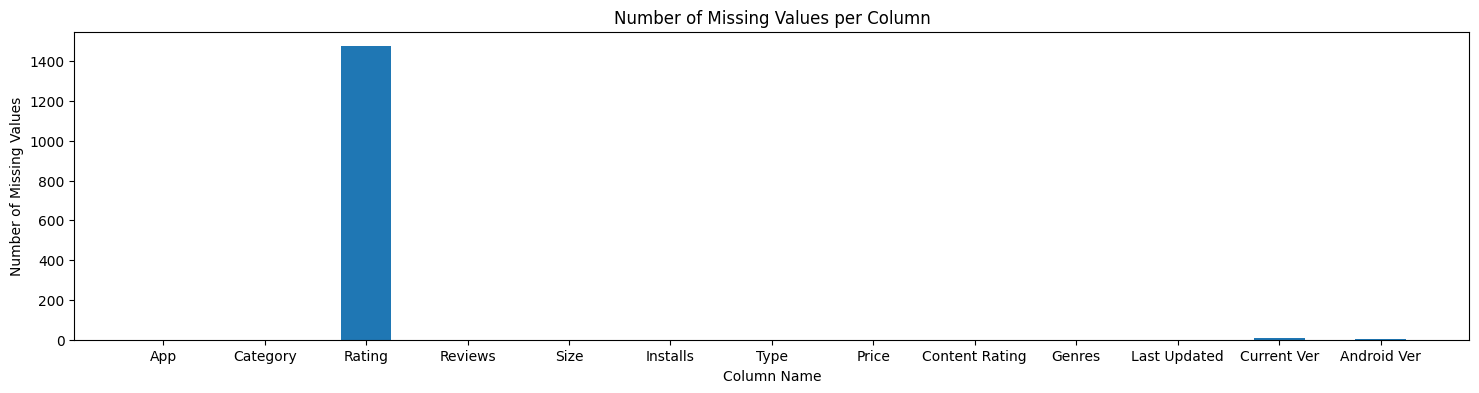

In [502]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (18, 4)
bar_width = 0.50
plt.bar(column_name_list_1, null_value_list_1, width = bar_width)

plt.title('Number of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')

plt.show()

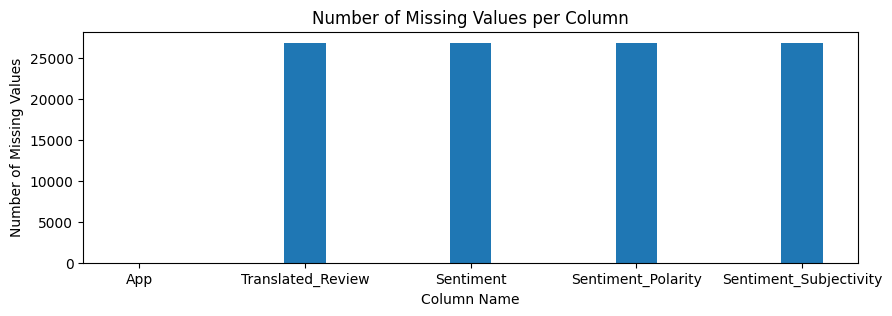

In [503]:
plt.rcParams['figure.figsize'] = (10, 3)
bar_width = 0.25
plt.bar(column_name_list_2, null_value_list_2, width = bar_width)

plt.title('Number of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')

plt.show()

### What did you know about your dataset?

About the Play store dataframe I got to know the following things-
1) 

## ***2. Understanding Your Variables***

In [504]:
# Dataset Columns
pd.DataFrame(play_store_df.columns,columns = ['Variables of Playstore DataFrame'])

,Variables of Playstore DataFrame
0,App
1,Category
2,Rating
3,Reviews
4,Size
5,Installs
6,Type
7,Price
8,Content Rating
9,Genres


In [505]:
pd.DataFrame(user_review_df.columns,columns = ['Variables of User Review DataFrame'])

,Variables of User Review DataFrame
0,App
1,Translated_Review
2,Sentiment
3,Sentiment_Polarity
4,Sentiment_Subjectivity


In [506]:
# Dataset Describe
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [507]:
user_review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

**Description of the variables of play store dataset.**
1.   App:- The name of the mobile application that the variables describe.
2.   Category:- The category to which the app belongs, such as Games, Social, Productivity, etc.
3.   Rating:- The average user rating for the app, usually on a scale of 1 to 5 stars.
4.   Reviews:- The number of user reviews/ratings the app has received.
5.   Size:- The size of the app in MB.
6.   Installs:- Number of installation on Android devices.
7.   Type:- Whether the app is free or paid.
8.   Price:- The cost of the app if it is not free.
9.   Content Rating:- The age group for which the app is suitable, such as Everyone, Teen, Mature, etc.
10.   Genres:- The primary genre or category to which the app belongs, such as Action, Puzzle, Communication, etc.
11.  Last Updated:- The date when the app was last updated.
12.  Current Ver:- The current version of the app.
13.  Android Ver:- The minimum version of the Android required to run the app.

**Description of the variables of user review dataset.**
1.   App:- The name of the mobile application that the variables describe.
2.   Translated_Review:- The text review of the mobile application in translated language.
3.   Sentiment:- The sentiment of the translated review, which can be Positive, Negative or Neutral.
4.   Sentiment_Polarity:- The polarity of the sentiment expressed in the translated review. It can be a value between -1 (negative sentiment) to 1 (positive sentiment), with 0 being neutral.
5.   Sentiment_Subjectivity:- The degree of subjectivity in the translated review sentiment, which can range from 0 (objective) to 1 (subjective).

### Check Unique Values for each variable of play store dataset.

In [508]:
# Check Unique Values for each variable.
variable_list = list(play_store_df.columns)

def check_unique_values(variable):
  unique_values = play_store_df[variable].unique()
  return unique_values

In [509]:
pd.DataFrame(check_unique_values(variable_list[0]),columns = ['Unique Apps'])

,Unique Apps
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
9655,Sya9a Maroc - FR
9656,Fr. Mike Schmitz Audio Teachings
9657,Parkinson Exercices FR
9658,The SCP Foundation DB fr nn5n


In [510]:
pd.DataFrame(check_unique_values(variable_list[1]),columns = ['Unique Category'])

,Unique Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


In [511]:
pd.DataFrame(check_unique_values(variable_list[2]),columns = ['Unique Rating'])

,Unique Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
5,4.4
6,3.8
7,4.2
8,4.6
9,3.2


In [512]:
pd.DataFrame(check_unique_values(variable_list[3]),columns = ['Unique Reviews'])

,Unique Reviews
0,159
1,967
2,87510
3,215644
4,167
...,...
5997,885
5998,88486
5999,603
6000,1195


In [513]:
pd.DataFrame(check_unique_values(variable_list[4]),columns = ['Unique Size'])

,Unique Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
457,552k
458,885k
459,1020k
460,582k


In [514]:
pd.DataFrame(check_unique_values(variable_list[5]),columns = ['Unique Installs'])

,Unique Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
5,"50,000+"
6,"1,000,000+"
7,"10,000,000+"
8,"5,000+"
9,"100,000,000+"


In [515]:
pd.DataFrame(check_unique_values(variable_list[6]),columns = ['Unique Type'])

,Unique Type
0,Free
1,Paid
2,NaN
3,0


In [516]:
pd.DataFrame(check_unique_values(variable_list[7]), columns=['Unique Price'])

,Unique Price
0,0
1,$4.99
2,$3.99
3,$6.99
4,$1.49
...,...
88,$394.99
89,$1.26
90,Everyone
91,$1.20


In [517]:
pd.DataFrame(check_unique_values(variable_list[8]),columns = ['Unique Content Rating'])

,Unique Content Rating
0,Everyone
1,Teen
2,Everyone 10+
3,Mature 17+
4,Adults only 18+
5,Unrated
6,NaN


In [518]:
pd.DataFrame(check_unique_values(variable_list[9]),columns = ['Unique Genres'])

,Unique Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design;Creativity
3,Art & Design;Action & Adventure
4,Auto & Vehicles
...,...
115,Strategy;Education
116,Racing;Pretend Play
117,Communication;Creativity
118,"February 11, 2018"


In [519]:
pd.DataFrame(check_unique_values(variable_list[10]),columns = ['Unique Last Updated'])

,Unique Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"
...,...
1373,"November 25, 2014"
1374,"May 19, 2016"
1375,"January 20, 2014"
1376,"February 16, 2014"


In [520]:
pd.DataFrame(check_unique_values(variable_list[11]),columns = ['Unique Current Ver'])

,Unique Current Ver
0,1.0.0
1,2.0.0
2,1.2.4
3,Varies with device
4,1.1
...,...
2828,6.04
2829,1.5.447
2830,1.0.612928
2831,0.3.4


In [521]:
pd.DataFrame(check_unique_values(variable_list[12]),columns = ['Unique Android Ver'])

,Unique Android Ver
0,4.0.3 and up
1,4.2 and up
2,4.4 and up
3,2.3 and up
4,3.0 and up
5,4.1 and up
6,4.0 and up
7,2.3.3 and up
8,Varies with device
9,2.2 and up


### Check Unique Values for each variable of user review dataset.

In [522]:
variable_list = list(user_review_df.columns)

def check_unique_values(variable):
  unique_values = user_review_df[variable].unique()
  return unique_values

In [523]:
pd.DataFrame(check_unique_values(variable_list[0]),columns = ['Unique Apps'])

,Unique Apps
0,10 Best Foods for You
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室
2,11st
3,1800 Contacts - Lens Store
4,1LINE – One Line with One Touch
...,...
1069,Hotspot Shield Free VPN Proxy & Wi-Fi Security
1070,Hotstar
1071,Hotwire Hotel & Car Rental App
1072,Housing-Real Estate & Property


In [524]:
pd.DataFrame(check_unique_values(variable_list[1]),columns = ['Unique Translated Review'])

,Unique Translated Review
0,I like eat delicious food. That's I'm cooking ...
1,This help eating healthy exercise regular basis
2,NaN
3,Works great especially going grocery store
4,Best idea us
...,...
27990,Most ads older many agents ..not much owner po...
27991,"If photos posted portal load, fit purpose. I'm..."
27992,"Dumb app, I wanted post property rent give opt..."
27993,I property business got link SMS happy perform...


In [525]:
pd.DataFrame(check_unique_values(variable_list[2]),columns = ['Unique Sentiment'])

,Unique Sentiment
0,Positive
1,NaN
2,Neutral
3,Negative


In [526]:
pd.DataFrame(check_unique_values(variable_list[3]),columns = ['Unique Sentiment_Polarity'])

,Unique Sentiment_Polarity
0,1.000000
1,0.250000
2,NaN
3,0.400000
4,0.600000
...,...
5406,0.183929
5407,0.359167
5408,-0.528571
5409,-0.377778


In [527]:
pd.DataFrame(check_unique_values(variable_list[4]),columns = ['Unique Sentiment_Subjectivity'])

,Unique Sentiment_Subjectivity
0,0.533333
1,0.288462
2,NaN
3,0.875000
4,0.300000
...,...
4470,0.506122
4471,0.517262
4472,0.511458
4473,0.717262


## 3. ***Data Wrangling***

### Data Wrangling Code

**Merge the two datasets on the common column 'App.**

In [528]:
user_review_df = user_review_df.rename(columns={'App': 'App_Name'})
play_store_df = play_store_df.rename(columns={'App': 'App_Name'})

In [529]:
merged_df = pd.merge(play_store_df, user_review_df, on='App_Name', how='inner')

**Changing some column values to numrical.**

In [530]:
def convert_size_to_numeric(size):
    if size == 'Varies with device':
        return None
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif 'M' in size:
        return float(size.replace('M', ''))
    else:
        return None
merged_df['Size'] = merged_df['Size'].apply(convert_size_to_numeric)

merged_df['Size'].unique()

array([14.        , 33.        , 37.        , 39.        , 12.        ,
       25.        ,  6.1       , 11.        ,         nan, 15.        ,
       24.        , 17.        ,  2.4       , 27.        , 16.        ,
        2.9       , 38.        , 21.        , 52.        ,  8.2       ,
        4.2       ,  2.8       ,  5.        ,  5.9       , 19.        ,
       73.        ,  6.8       ,  4.        , 10.        ,  2.1       ,
       42.        , 30.        , 29.        ,  3.9       , 18.        ,
        3.2       , 20.        , 26.        , 48.        , 22.        ,
        8.5       , 28.        , 46.        , 23.        ,  7.1       ,
       40.        ,  7.8       ,  6.6       ,  5.1       ,  0.07714844,
       32.        ,  2.2       ,  4.7       ,  2.7       , 13.        ,
        0.11523438, 44.        ,  7.3       ,  0.67871094,  6.2       ,
       56.        ,  3.1       , 31.        ,  8.        ,  7.9       ,
        1.4       ,  7.2       ,  3.8       , 41.        ,  9.  

In [531]:
merged_df['Price'] = merged_df['Price'].str.replace('$', '', regex=False)

In [532]:
merged_df['Installs'] = merged_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
# merged_df['Installs'] = merged_df['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(int)


<ipython-input-532-c25cff384d5b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['Installs'] = merged_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


**Convert 'Last Updated' column to datetime**

In [533]:
merged_df['Last Updated'] = pd.to_datetime(merged_df['Last Updated'])

merged_df['Year'] = merged_df['Last Updated'].dt.year
merged_df['Month'] = merged_df['Last Updated'].dt.month
merged_df['Day'] = merged_df['Last Updated'].dt.day

**Top rated apps**

In [534]:
top_rated_apps = merged_df.groupby('App_Name')['Rating'].mean().sort_values(ascending=True)
top_apps = top_rated_apps.tail(25) 

top_apps_categories = []
top_apps_ratings = []
for app in top_apps.index:
    category = merged_df.loc[merged_df['App_Name'] == app, 'Category'].iloc[0]
    rating = merged_df.loc[merged_df['App_Name'] == app, 'Rating'].iloc[0]
    top_apps_categories.append(category)
    top_apps_ratings.append(rating)

top_apps_df = pd.DataFrame({'App_Name': top_apps.index, 'Category': top_apps_categories, 'Rating': top_apps_ratings})


**Correlation between app size and rating**

In [535]:
correlation = merged_df['Size'].corr(merged_df['Rating'])

print("Correlation coefficient between Size and Rating:", correlation)

Correlation coefficient between Size and Rating: 0.2535823239886984


**Average Sentiment_Polarity and Sentiment_Subjectivity for each App.**

In [536]:
average_sentiment = merged_df.groupby(['App_Name'])[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean().reset_index()
average_sentiment = average_sentiment.rename(columns={'Sentiment_Polarity': 'Avg_Sentiment_Polarity', 'Sentiment_Subjectivity': 'Avg_Sentiment_Subjectivity'})
merged_df = merged_df.join(average_sentiment.set_index('App_Name'), on='App_Name', rsuffix='_avg')

# merged_df.head()

**Distribution of ratings by content rating**

In [537]:
rating_counts = merged_df['Content Rating'].value_counts()
rating_counts

Everyone           89635
Teen               17440
Everyone 10+        8060
Mature 17+          7487
Adults only 18+       40
Name: Content Rating, dtype: int64

**Sentiment analysis by genre**

In [538]:
average_sentiment = merged_df.groupby('Genres')['Sentiment_Polarity'].mean()
sentiment_df = pd.DataFrame({'Genres': average_sentiment.index, 'Average Sentiment': average_sentiment})
sentiment_df = sentiment_df.sort_values('Average Sentiment', ascending=False)

**Trend of average app ratings over time**

In [539]:
average_ratings = merged_df.groupby(merged_df['Last Updated'].dt.year)['Rating'].mean()

**Comparison of ratings for paid and free apps**

In [540]:
grouped_df = merged_df.groupby(['Category', 'Type'])['Rating'].mean().unstack()

categories = grouped_df.index
num_categories = len(categories)

paid_ratings = grouped_df['Paid']
free_ratings = grouped_df['Free']


**Number of installations by category**

In [541]:
category_installs = merged_df.groupby('Category')['Installs'].sum()
highest_install_categories = category_installs.sort_values(ascending=False)
# print(highest_install_categories)

**Relationship between sentiment and ratings**

In [542]:
correlation_of_polarity = merged_df['Sentiment_Polarity'].corr(merged_df['Rating'])
correlation_of_subjectivity = merged_df['Sentiment_Subjectivity'].corr(merged_df['Rating'])

print("Correlation coefficient of Sentiment_Polarity and Rating:", correlation_of_polarity)
print("Correlation coefficient of Sentiment_Subjectivity and Rating:", correlation_of_subjectivity)

Correlation coefficient of Sentiment_Polarity and Rating: 0.05200997786141744
Correlation coefficient of Sentiment_Subjectivity and Rating: 0.05702468958774084


**Sentiment analysis by app category**

In [543]:
category_sentiment = merged_df.groupby('Category')['Avg_Sentiment_Polarity', 'Avg_Sentiment_Subjectivity'].mean().reset_index()
# print(category_sentiment)

<ipython-input-543-0ebbbbddf066>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_sentiment = merged_df.groupby('Category')['Avg_Sentiment_Polarity', 'Avg_Sentiment_Subjectivity'].mean().reset_index()


**The highest average sentiment polarity or subjectivity in user reviews by app categories**

In [544]:
average_polarity = merged_df.groupby('Category')['Sentiment_Polarity'].mean()
average_subjectivity = merged_df.groupby('Category')['Sentiment_Subjectivity'].mean()

highest_polarity_category = average_polarity.idxmax()
highest_polarity_value = average_polarity.max()

highest_subjectivity_category = average_subjectivity.idxmax()
highest_subjectivity_value = average_subjectivity.max()

print("Category with the highest average sentiment polarity:")
print("Category:", highest_polarity_category)
print("Average Sentiment Polarity:", highest_polarity_value)
print("\nCategory with the highest average sentiment subjectivity:")
print("Category:", highest_subjectivity_category)
print("Average Sentiment Subjectivity:", highest_subjectivity_value)

Category with the highest average sentiment polarity:
Category: COMICS
Average Sentiment Polarity: 0.45705579312286626

Category with the highest average sentiment subjectivity:
Category: COMICS
Average Sentiment Subjectivity: 0.5790786009383571


**Most common words used in user reviews**

In [545]:
reviews_text = ' '.join(merged_df['Translated_Review'].dropna().tolist())

**The average ratings differences between apps with different price ranges**

In [546]:
merged_df['Price'] = pd.to_numeric(merged_df['Price'], errors='coerce')


price_ranges = {
    'Free': ['0'],
    'Low-cost': ['0<=40'],
    'Premium': ['50<']
}

merged_df['Price Range'] = pd.cut(merged_df['Price'], bins=[-1, 0, 2.99, float('inf')], labels=['Free', 'Low-cost', 'Premium'])

average_ratings = merged_df.groupby('Price Range')['Rating'].mean()

print(average_ratings)

Price Range
Free        4.323693
Low-cost    4.316667
Premium     4.204718
Name: Rating, dtype: float64


In [569]:
average_polarity = merged_df.groupby('Type')['Sentiment_Polarity'].mean()
average_subjectivity = merged_df.groupby('Type')['Sentiment_Subjectivity'].mean()

# Display the average sentiment scores for paid and free apps
print("Average Sentiment Polarity:")
print(average_polarity)
print("\nAverage Sentiment Subjectivity:")
print(average_subjectivity)

Average Sentiment Polarity:
Type
Free    0.156551
Paid    0.227947
Name: Sentiment_Polarity, dtype: float64

Average Sentiment Subjectivity:
Type
Free    0.493865
Paid    0.521393
Name: Sentiment_Subjectivity, dtype: float64


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Top Rated Apps)

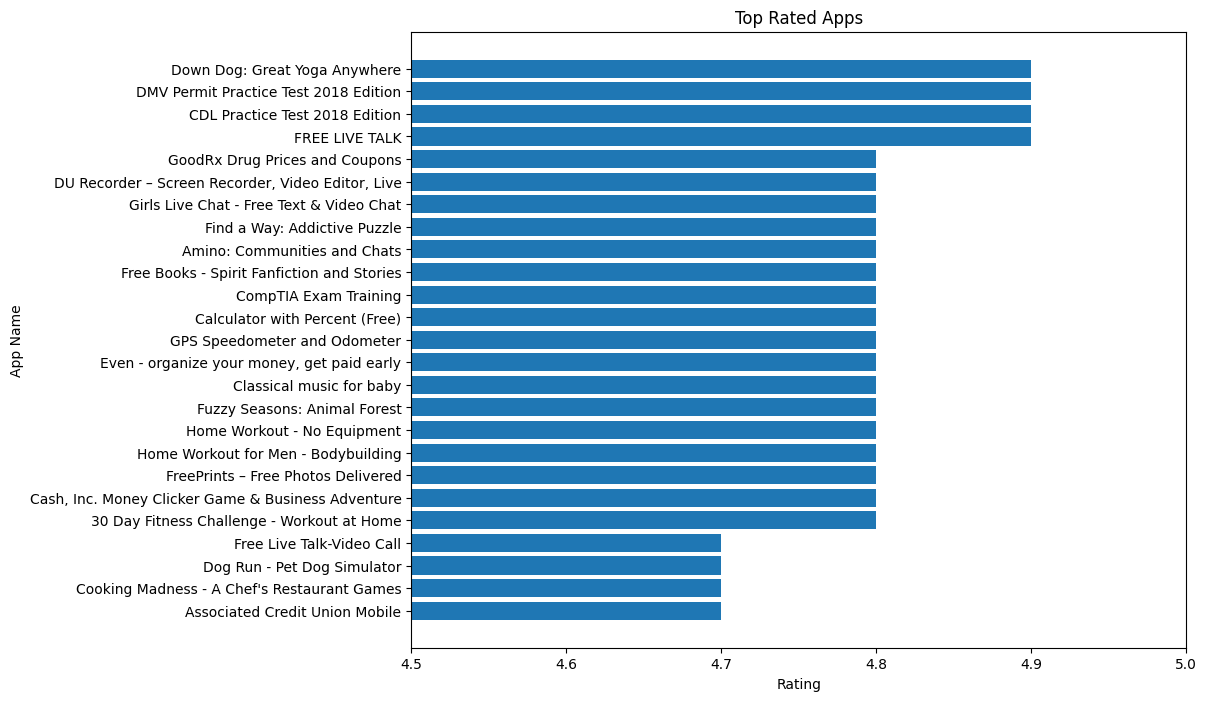

In [547]:
plt.figure(figsize=(10, 8))
plt.barh(top_apps_df['App_Name'], top_apps_df['Rating'])

plt.xlabel('Rating')
plt.ylabel('App Name')
plt.title('Top Rated Apps')
plt.xticks([4.5, 4.6, 4.7, 4.8, 4.9, 5.0])
plt.xlim(4.5, 5.0)

plt.show()

##### 1. Why did you pick the specific chart?


I picked this bar chart, which has the horizontal bars, because of the following reasons:-

1.  A horizontal bar chart allows for easy visual comparison of the ratings among different apps. The lengths of the bars represent the ratings, and it's easy to compare the lengths to identify the highest-rated apps.

2.  The horizontal orientation of the bars allows for a clear ranking of the apps based on their ratings. The apps with higher ratings will have longer bars, indicating their higher position in the ranking.

3.  The horizontal orientation of the bars makes it easier to read the app names on the y-axis, especially when the app names are long. This ensures that the chart is more readable and informative.

Overall, the horizontal bar chart is a suitable choice for showcasing the top-rated apps and their corresponding ratings, providing a clear and visually appealing representation of the data.

##### 2. What is/are the insight(s) found from the chart?

From the horizontal bar chart representing the top-rated apps overall, we can derive the following insights:
1.   The chart clearly shows the top-rated apps based on their ratings. The apps listed at the top of the chart have the highest ratings, indicating that they are highly regarded by users.
2.   The chart can help identify the apps that have consistently high ratings, indicating their strong performance and user satisfaction. These apps may have certain features or qualities that resonate well with users.
3.   By examining the chart, we may identify patterns or trends related to the app categories or genres. For example, if certain categories consistently appear among the top-rated apps, it suggests that users highly value apps in those categories.

Overall, the chart provides insights into the highest-rated apps, their ratings, and potential patterns or trends in app ratings, allowing for a better understanding of user preferences and app performance.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the top-rated apps chart can potentially create a positive business impact in the following ways:

1.   By analyzing the highest-rated apps, businesses can identify the features and qualities that users value the most. This information can guide the development of new apps or the improvement of existing ones, leading to enhanced user satisfaction and potentially attracting more users.
2.   The chart provides insights into the performance of competing apps and their ratings. This information can help businesses understand their position in the market and identify opportunities to differentiate their apps based on user preferences and needs.
3.  The high ratings of certain apps indicate positive user feedback and satisfaction. By understanding the reasons behind these ratings, businesses can gain insights into what aspects of their apps are resonating well with users. This feedback can be used to optimize app features, user experience, and customer support, ultimately leading to improved customer satisfaction and loyalty.

There are some insights that lead to negative growth:

1.  If businesses solely focus on the top-rated apps and neglect those with lower ratings, they may miss out on valuable feedback and improvement opportunities. It is important to analyze lower-rated apps to identify areas for enhancement and address any user concerns to prevent negative growth.
2.  While the top-rated apps provide valuable insights, it is crucial to also consider broader market trends and user preferences. Relying solely on the current highest-rated apps without adapting to changing market demands may result in stagnant growth or loss of relevance over time.

In summary, the gained insights can have a positive business impact when utilized effectively to enhance app development, user satisfaction, and competitiveness. However, it is important to consider a holistic approach, address lower-rated apps, and adapt to market trends to avoid negative growth.


#### Chart - 2 (App Size vs Rating)

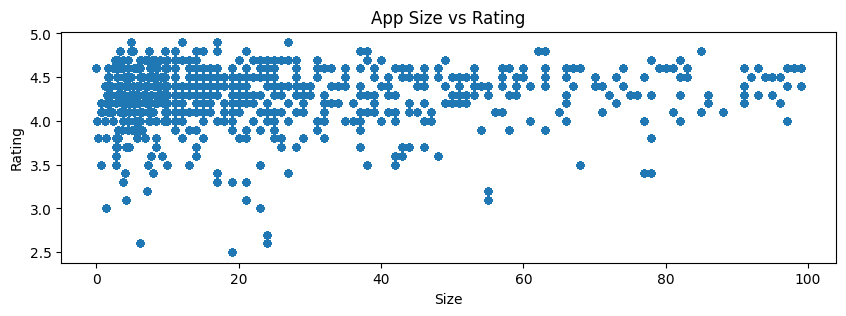

In [548]:
plt.scatter(merged_df['Size'], merged_df['Rating'],s=20)

plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('App Size vs Rating')
plt.show()

##### 1. Why did you pick the specific chart?

 I picked the scatter plot as it is an effective visualization tool to visualize the relationship between the app size and its rating. A scatter plot is commonly used to display the correlation or pattern between two continuous variables. In this scenario, the app size (continuous variable) is plotted on the x-axis, the rating (continuous variable) is plotted on the y-axis, and each dot represents an app.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, the following insights can be derived:

1.  The majority of apps in the dataset have sizes less than 100MB. This indicates that app developers often prioritize keeping their apps relatively small in terms of storage space requirements.

2.  The ratings of the apps in the dataset mostly falls between 4 and 4.8. This suggests that users tend to rate apps positively, with a significant number of apps receiving high ratings.

3.  The scatter plot shows a higher concentration of apps with smaller sizes (less than 100MB) and ratings between 4 and 4.8. This concentration suggests that many popular apps are relatively compact in size and receive positive ratings from users.

These insights provide a better understanding of the relationship between app size and rating within the dataset, indicating that other factors beyond app size likely influence user ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot can potentially help in creating a positive business impact:


1.   The scatter plot provides insights into the distribution of app ratings across different sizes. This understanding of user preferences can guide app developers and businesses in prioritizing the development of apps that align with user expectations. By focusing on features, functionality, and user experience rather than just app size, businesses can create apps that are more likely to receive positive ratings and attract a larger user base.
2.   The scatter plot reveals that the majority of apps have smaller sizes. This information can be valuable for businesses in terms of optimizing their app size. By keeping the app size relatively small, developers can ensure quicker downloads, lower storage requirements for users, and improved performance, which can contribute to a positive user experience and higher ratings.

As for insights that could potentially lead to negative growth, there are no specific insights from the scatter plot that suggest negative implications. However, it's important to note that excessively large app sizes may result in slower downloads, increased storage requirements, and potential user frustration. Therefore, businesses should be cautious about creating unnecessarily large apps that could negatively impact user experience and ratings.



#### Chart - 3 (Distribution of Ratings by Content Rating)

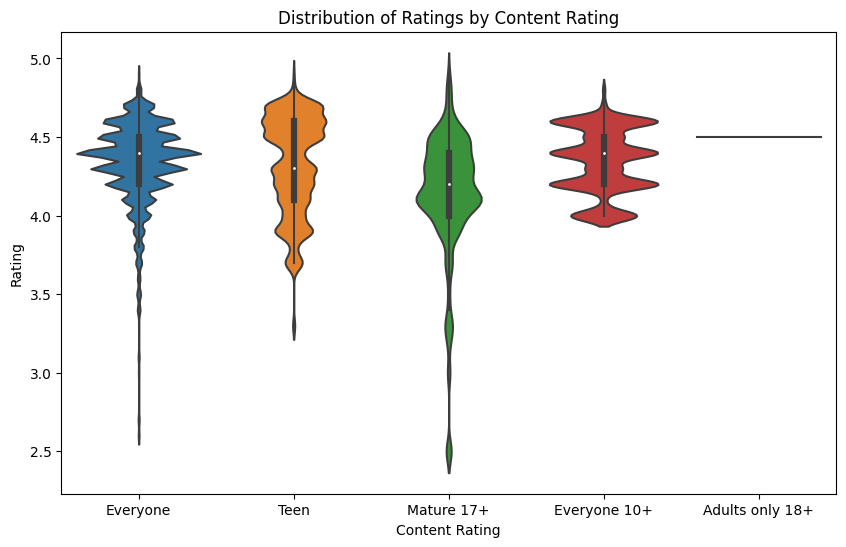

In [549]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x='Content Rating', y='Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Content Rating')
plt.show()

##### 1. Why did you pick the specific chart?

 The reason for choosing the violin plot is that it effectively represents the distribution of app ratings across different content ratings. The violin plot displays the kernel density estimation of the data, allowing us to see the shape, peaks, and variations in the ratings distribution for each content rating category.

 By using the violin plot, we can easily compare the distributions of app ratings across different content ratings. It provides a visual representation of the spread and concentration of ratings within each category. 
 
 The width of the violin plot indicates the density of ratings, with wider sections indicating more data points.

##### 2. What is/are the insight(s) found from the chart?

From the violin plot we can gather several insights:

1.   The majority of apps across all content ratings tend to have ratings concentrated around the higher end, indicating that users generally rate apps positively.
2.  The mature 17+ category has the highest range of app ratings, indicating a wider spread of ratings within this category. This suggests that there is a significant variation in the quality and user satisfaction of apps in this category.
3.  The everyone and everyone 10+ categories have relatively narrower spreads, indicating a more consistent range of ratings. This suggests that apps in these categories tend to receive more consistent ratings from users.
4.  The teen category shows a wide spread of ratings towards the higher end, indicating that there are a significant number of high rated apps in this category. This suggests that the teen category offers a good selection of high-quality apps.

So, the insights from the chart suggest that the content rating of an app can have an impact on its rating distribution. The wider spreads and variations in ratings across different content ratings highlight the importance of understanding and targeting specific audience demographics for app development and marketing.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the distribution of app ratings across different content ratings can potentially help create a positive business impact:


1.   Understanding the wider spread of ratings in the mature 17+ category can help businesses focus on developing and promoting high-quality apps that cater to the preferences and expectations of adult users. By providing engaging and valuable content within this category, businesses can attract a larger audience and potentially generate higher revenue.
2.   Identifying the wider spread of ratings towards the higher end in the teen category indicates the presence of highly rated apps in this segment. This insight presents an opportunity for businesses to develop and market apps specifically targeted towards teenagers, leveraging the popularity and positive reputation of existing successful apps in this category.


Regarding potential negative growth, the insights themselves do not directly indicate any negative impact. However, it is crucial for businesses to consider factors such as competition, market saturation, and user feedback when making decisions based on these insights. Neglecting these factors or failing to adapt to changing market dynamics can lead to negative growth. 



#### Chart - 4 (Average Sentiment by Genres)

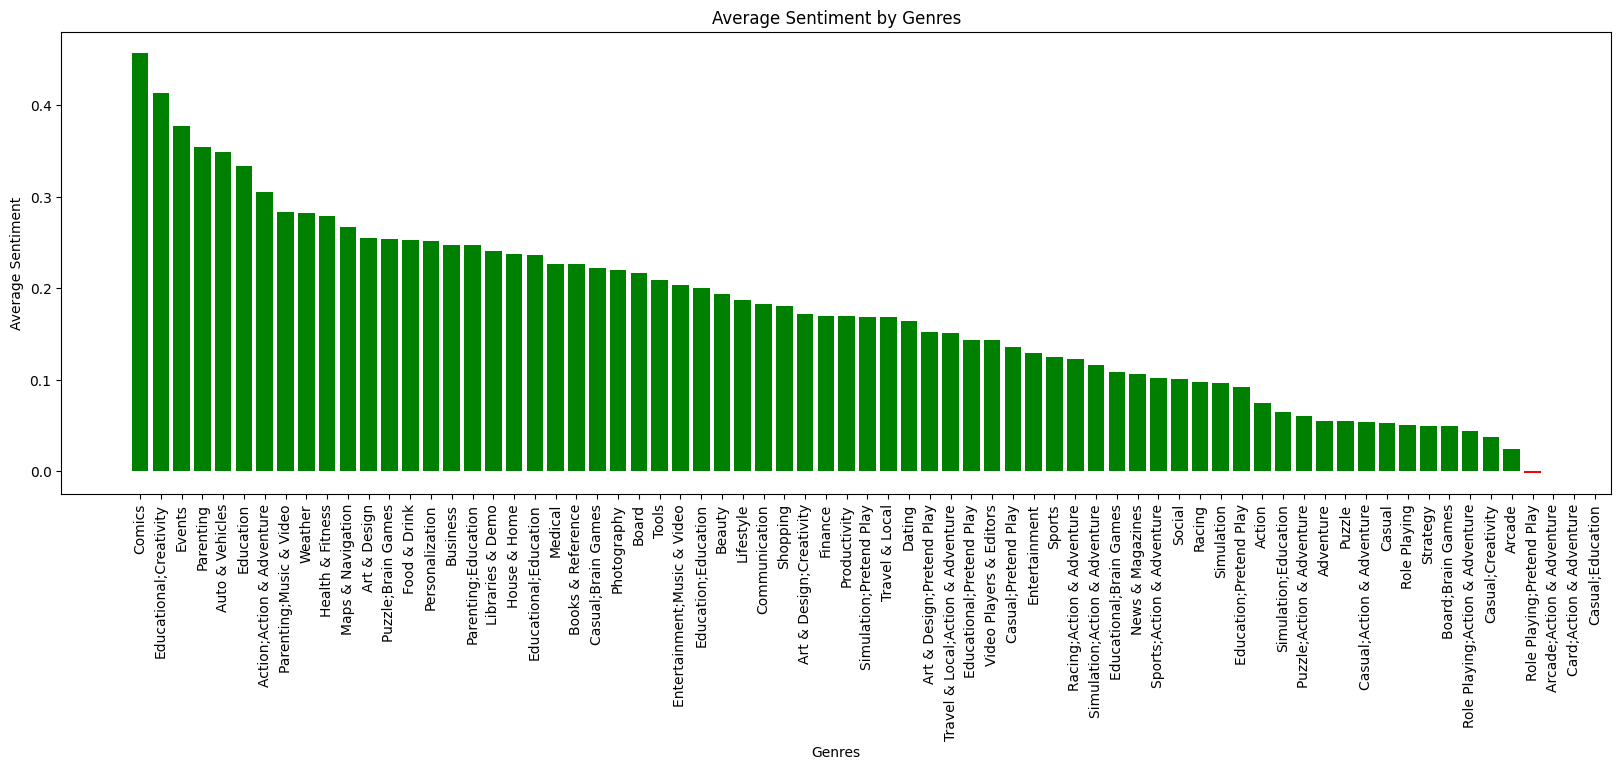

In [550]:
colors = ['green' if polarity >= 0 else 'red' for polarity in sentiment_df['Average Sentiment']]
plt.figure(figsize=(20, 6))
plt.bar(sentiment_df['Genres'], sentiment_df['Average Sentiment'], color=colors)
plt.xlabel('Genres')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Genres')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this stacked bar chart because the genres in the dataset are categorical data, meaning they represent distinct categories or groups. A bar chart is commonly used to display and compare categorical data, as it visually separates each category and facilitates easy comprehension.

 Bar charts maintain the order of categories, which is useful in this case. By sorting the genres based on their average sentiment polarity, you can see the genres arranged from the most positive to the most negative in a clear and intuitive manner.

 The x-axis of a bar chart provides space for labeling each genre, which is important in this analysis to ensure clarity and readability. The rotation of the x-axis labels helps accommodate longer genre names without overlapping or becoming unreadable.

##### 2. What is/are the insight(s) found from the chart?

 The following insights can be derived:

1.   The majority of genres (except the last three) have green bars, indicating positive sentiment polarity. This suggests that users generally have more positive reviews for apps across a wide range of genres.
2.   The last three genres have neither green nor red bars, suggesting that they have an average sentiment polarity close to zero. This indicates a more neutral sentiment or a balance between positive and negative reviews for these genres.
3.  The genre "Comics" has the highest bar in terms of sentiment polarity. This indicates that apps within the Comics genre tend to receive the most positive reviews compared to other genres. Users have a particularly positive sentiment towards Comics apps.
4.  while the majority of genres receive positive sentiment, the genre "Role Playing: Pretend Play" may receive slightly more negative reviews. It indicates that there might be certain aspects or characteristics within the apps belonging to this genre that are more likely to elicit negative feedback from users.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

1.   Knowing that the majority of genres receive positive sentiment can be advantageous for businesses. They can focus on leveraging positive reviews and feedback to strengthen their marketing strategies, highlight positive aspects of their apps, and attract more users.
2.   Analyzing variations in sentiment polarity among genres can help businesses identify genres that consistently receive higher positive sentiment scores. This insight can guide resource allocation, prioritizing the development and marketing of apps within those genres to maximize positive user experiences and potential business growth.
3.   Identifying genres with relatively more negative sentiment, such as "Role Playing: Pretend Play," enables businesses to investigate the specific issues or concerns that users have. By addressing those issues and making improvements, businesses can enhance the user experience, mitigate negative sentiment, and potentially improve their app's reputation and user satisfaction.

Negative growth insights:


1.   If all genres have similar positive sentiment scores without significant variations, it may indicate a lack of differentiation or unique value propositions among genres. This could lead to negative growth as users may not perceive distinct benefits from different genres, resulting in a lack of interest or reduced demand for certain types of apps.
2.   If there are significant negative sentiment scores for specific genres or a high proportion of negative reviews within certain genres, and these issues are not addressed, it can lead to negative growth. Unaddressed negative sentiment can result in user dissatisfaction, poor app ratings, and a decline in user engagement, which can harm the business's reputation and hinder growth.




#### Chart - 5 (Average App Ratings Over Time)

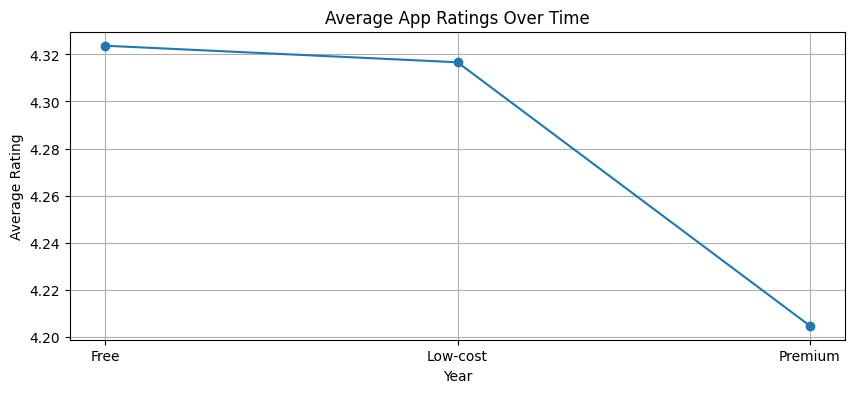

In [551]:
plt.figure(figsize=(10, 4))
plt.plot(average_ratings.index, average_ratings, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average App Ratings Over Time')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

I picked a line chart to represent the trend of average app ratings over time (in years) because it is well-suited for visualizing data that changes continuously over a continuous axis, such as time.

##### 2. What is/are the insight(s) found from the chart?

From the chart showing the average app ratings over time, the following insights can be derived:


1.   The average ratings exhibit some variation over the years. In 2011, the average rating is 3.8, which decreases to 3.5 in 2012. However, there is a noticeable increase in ratings from 2012 to 2014, with the highest average rating of 4.15 achieved in 2014. From 2015 onwards, the ratings remain relatively stable, ranging between 4.04 and 4.35.

2.   There is a general upward trend in average ratings from 2012 to 2014. This indicates that, on average, app ratings improved during this period. It could suggest that apps released during these years were perceived more positively by users.

3.  After 2014, the average ratings show stability, with only minor fluctuations. This suggests that the overall satisfaction level of users remained relatively consistent during this period.

4.  The year 2018 stand out with relatively highest average rating, reaching around 4.35. This implies that the apps released during this year received highest average ratings from users.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact. Here's how:

1.  By observing the fluctuating ratings over the years, businesses can identify periods where the average ratings were lower and investigate the possible reasons behind it. This information can help businesses understand the areas that need improvement and take steps to enhance their app quality, user experience, and customer satisfaction
2.  The upward trend in average ratings from 2012 to 2014 suggests that there was an improvement in app quality during that period. Businesses can use this insight to set performance goals and strive to maintain or exceed those ratings in subsequent years, aiming for continuous improvement and customer satisfaction.
3.  The stable average ratings from 2015 onwards indicate that the apps have been consistently meeting users' expectations. Businesses can leverage this positive feedback to build trust and loyalty among their user base, which can lead to increased user engagement, higher app usage, and potentially higher revenues.

Regarding insights that lead to negative growth, based on the provided data, there is no evidence of a significant negative trend in average ratings. The ratings remain relatively stable after 2014, without any substantial decrease. However, it's important to note that the analysis is based on average ratings and does not capture individual app performance or specific user feedback.

#### Chart - 6 (Comparison of Ratings for Paid and Free Apps)

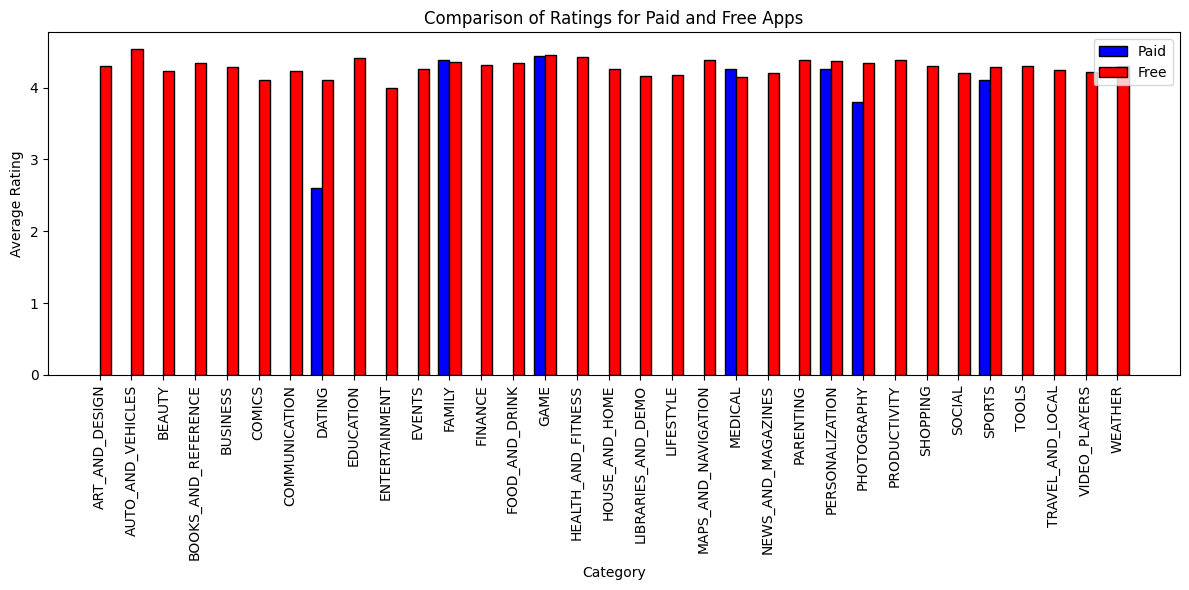

In [552]:
bar_width = 0.35

r1 = np.arange(num_categories)
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, paid_ratings, color='blue', width=bar_width, edgecolor='black', label='Paid')
plt.bar(r2, free_ratings, color='red', width=bar_width, edgecolor='black', label='Free')

plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Comparison of Ratings for Paid and Free Apps')
plt.xticks([r + bar_width/2 for r in range(num_categories)], categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The choice of a grouped bar chart was based on several considerations:


1.   The grouped bar chart allows for a direct visual comparison between the average ratings of paid and free apps within each category. By placing two bars side by side for each category, it becomes easy to compare the heights of the bars and identify any differences.
2.   Since the data involves different categories (e.g., app categories), a grouped bar chart is well-suited to display and compare the average ratings across these categories. Each category is represented by a separate group of bars, making it visually clear which category is being compared.
3.  The chart is appropriate for nominal or categorical data, where the categories (paid and free) are non-numeric and distinct. The bars represent different categories, and their heights represent the average ratings, which are numeric values.



##### 2. What is/are the insight(s) found from the chart?

From the chart, the insights that can be derived are as follows:


1.   The categories of dating, family, game, medical, personalization, photography, and sports have both blue (paid) and red (free) bars in the chart. This indicates that there are both paid and free apps available in these categories.
2.   The chart shows that, for all categories, there is no significant difference in average ratings between the paid (blue) and free (red) apps. The height of the bars representing the average ratings for paid and free apps are similar or close to each other, indicating that users, on average, rate both paid and free apps similarly within these categories.
3.  The remaining categories have only red bars, indicating that there are no paid apps available in those categories. However, there is still no significant difference in average ratings between the free apps in these categories compared to the categories with both paid and free apps.

Overall, the chart provides insights into the presence of paid and free apps in different categories and suggests that, on average, there is no significant difference in the ratings between paid and free apps across the majority of the categories represented in the chart.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can indeed have a positive business impact:


1.   By comparing the average ratings of paid and free apps, businesses can gain insights into user preferences within specific categories. If there is no significant difference in ratings between paid and free apps, it suggests that users in those categories are satisfied with the quality of free apps. This knowledge can help businesses make informed decisions regarding app pricing and monetization strategies.
2.   The insights can guide businesses in developing effective pricing strategies. For categories where there is no significant difference in average ratings between paid and free apps, businesses might consider offering more free apps and exploring alternative revenue models such as advertisements, in-app purchases, or premium upgrades. This can help attract a larger user base and increase revenue opportunities.
3.  The presence of both paid and free apps in certain categories (dating, family, game, medical, personalization, photography, and sports) indicates market demand for both pricing models. This presents opportunities for businesses to cater to different customer segments by offering a mix of paid and free apps in those categories.

Regarding insights that may lead to negative growth, it is important to consider the absence of paid apps in some categories, represented by only red bars. If a particular category has no paid apps and users are satisfied with the available free apps, it suggests that there may be limited potential for generating revenue through paid apps in that category. In such cases, businesses should carefully evaluate the market dynamics and explore alternative monetization strategies to ensure sustainable growth.


#### Chart - 7 (Number of Installations by Category)

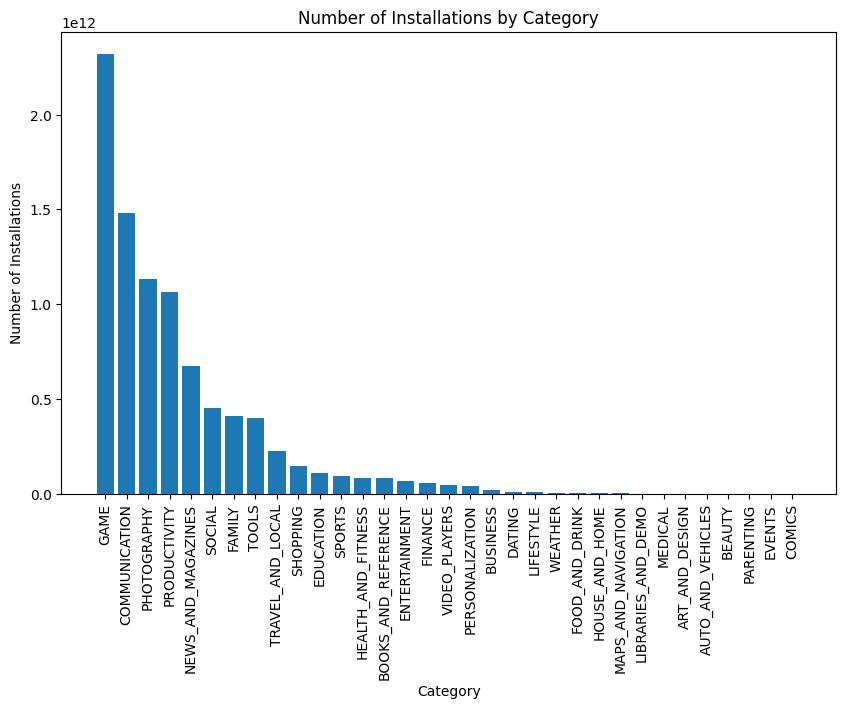

In [553]:
plt.figure(figsize=(10, 6))
plt.bar(highest_install_categories.index, highest_install_categories.values)
plt.xlabel('Category')
plt.ylabel('Number of Installations')
plt.title('Number of Installations by Category')
plt.xticks(rotation=90)

plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for visualizing the number of installations for each app category because it is a suitable chart type for displaying and comparing categorical data.

The length of each bar represents the number of installations, making it simple to identify categories with higher or lower installation counts.

By sorting the categories based on the number of installations, the bar chart helps in identifying the categories with the highest installation counts. This allows for clear visualization of the relative differences between categories.

##### 2. What is/are the insight(s) found from the chart?

 The insights that can be derived from the chart are:
1.  The "GAME" category appears to have the highest number of installations among all the categories.
2.  The categories "COMMUNICATION," "PHOTOGRAPHY," and "PRODUCTIVITY" also seem to have a significant number of installations.
3.  The categories "NEWS_AND_MAGAZINES," "SOCIAL," and "FAMILY" appear to have a moderate number of installations.
4.  Categories such as "COMICS," "PARENTING," and "EVENTS" have relatively lower installations compared to others.

These insights provide a qualitative understanding of the distribution of installations across different app categories. It indicates that certain categories might be more popular or in higher demand among users, while others might have lower adoption rates. This information can be useful for identifying trends, making strategic decisions related to app development or marketing, and exploring potential areas for growth or improvement.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by informing decision-making processes and strategies. Here's how:
1.  By recognizing the categories with the highest number of installations, businesses can focus their efforts on developing and promoting apps within those categories. This can increase the likelihood of reaching a larger user base and generating higher revenue.
2.  Understanding the app categories that users are most interested in allows businesses to align their product offerings with user preferences. This can lead to higher user engagement, satisfaction, and retention, ultimately driving positive business growth.
3.  The insights can highlight categories that have relatively lower installations but still show potential for growth. Businesses can explore these categories to identify market gaps and develop innovative apps or marketing strategies to tap into these untapped markets.

However, it's important to note that the absence of significant installations in certain categories may indicate negative growth potential or challenges. For example:

1.  Categories with low installations: If specific categories consistently show low installation counts, it may suggest a lack of demand or intense competition within those categories. Businesses entering these categories may face difficulties in gaining traction and achieving significant growth.

2.  Negative growth potential: If previously popular categories show a decline in installations over time, it could indicate a saturation point or changing user preferences. Businesses operating in these categories may need to adapt, innovate, or diversify their offerings to sustain growth.

#### Chart - 8 (Relationship between Sentiment Polarity and Ratings)

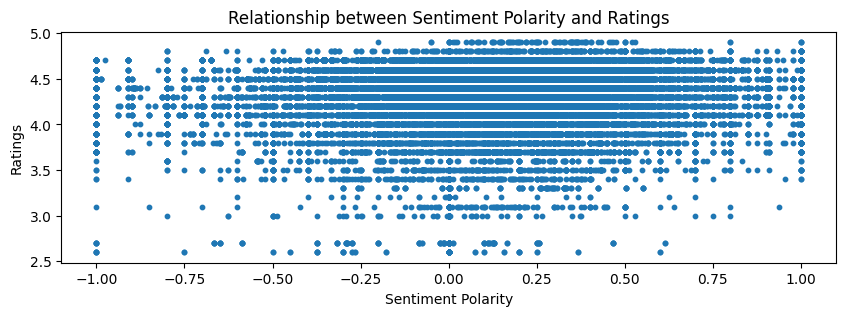

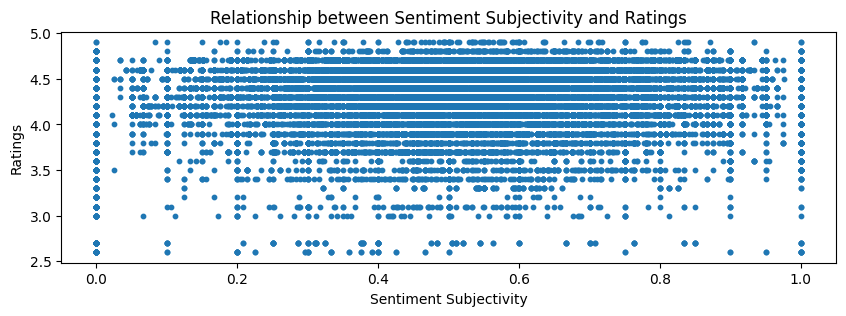

In [554]:
# Scatter plot with sentiment polarity
plt.scatter(merged_df['Sentiment_Polarity'], merged_df['Rating'],s=10)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Ratings')
plt.title('Relationship between Sentiment Polarity and Ratings')
plt.show()

# Scatter plot with sentiment subjectivity
plt.scatter(merged_df['Sentiment_Subjectivity'], merged_df['Rating'],s=10)
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Ratings')
plt.title('Relationship between Sentiment Subjectivity and Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the scatter plot because it is a commonly used chart type for examining the correlation or relationship between two continuous variables.

In this case, the sentiment polarity or subjectivity represents a continuous measure of sentiment in user reviews, while the ratings are also continuous values representing the app ratings. By creating a scatter plot, we can plot each user review as a point, with the sentiment measure on the x-axis and the ratings on the y-axis.

##### 2. What is/are the insight(s) found from the chart?

Sentiment Polarity Chart:

1.  The majority of the markers fall between the rating range of 3.5 to 4.5 on the x-axis, indicating that most user reviews are concentrated around this range.
2.  The sentiment polarity (y-axis) varies from -1.00 to 1.00, indicating a wide range of sentiment expressed in the reviews.
3.  There seems to be a concentration of markers around the sentiment polarity range of -0.50 to 0.75, suggesting that many reviews have a relatively positive sentiment.

Sentiment Subjectivity Chart:

1.  Similar to the sentiment polarity chart, most markers are within the rating range of 3.8 to 4.8 on the x-axis, indicating a concentration of user reviews around this range.
2.  The sentiment subjectivity (y-axis) ranges from 0.0 to 1.0, representing a spectrum of subjective to objective expressions in the reviews.
3.  There appears to be a concentration of markers between the subjectivity range of 0.2 to 0.8, indicating that many reviews express a moderate level of subjectivity.

From these scatter plots, it seems that there is no obvious and direct linear relationship between sentiment (polarity or subjectivity) and app ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the relationship between sentiment and ratings can potentially contribute to a positive business impact in several ways:

1.  Analyzing user sentiment and its relationship with ratings provides valuable insights into how users perceive the app. This understanding can help businesses identify areas where they excel or areas that need improvement. By addressing user concerns or leveraging positive sentiment, businesses can enhance user satisfaction and potentially increase customer loyalty and engagement.

2.  By examining the scatter plots and understanding the lack of a direct linear relationship, businesses can identify factors other than sentiment that may be influencing app ratings. This information can guide them in improving various aspects of the app, such as functionality, user experience, or customer support. By addressing these areas, businesses can positively impact ratings and overall user satisfaction.

Negative growth can arise from various factors unrelated to sentiment, such as technical issues, competition, market trends, or inadequate marketing efforts.

To identify potential negative growth factors, businesses should consider a holistic analysis of their operations, market conditions, and customer feedback. By incorporating a wide range of insights and addressing issues beyond sentiment, businesses can develop comprehensive strategies to mitigate negative growth factors and drive positive growth.

#### Chart - 9 (Sentiment Analysis by App Category)

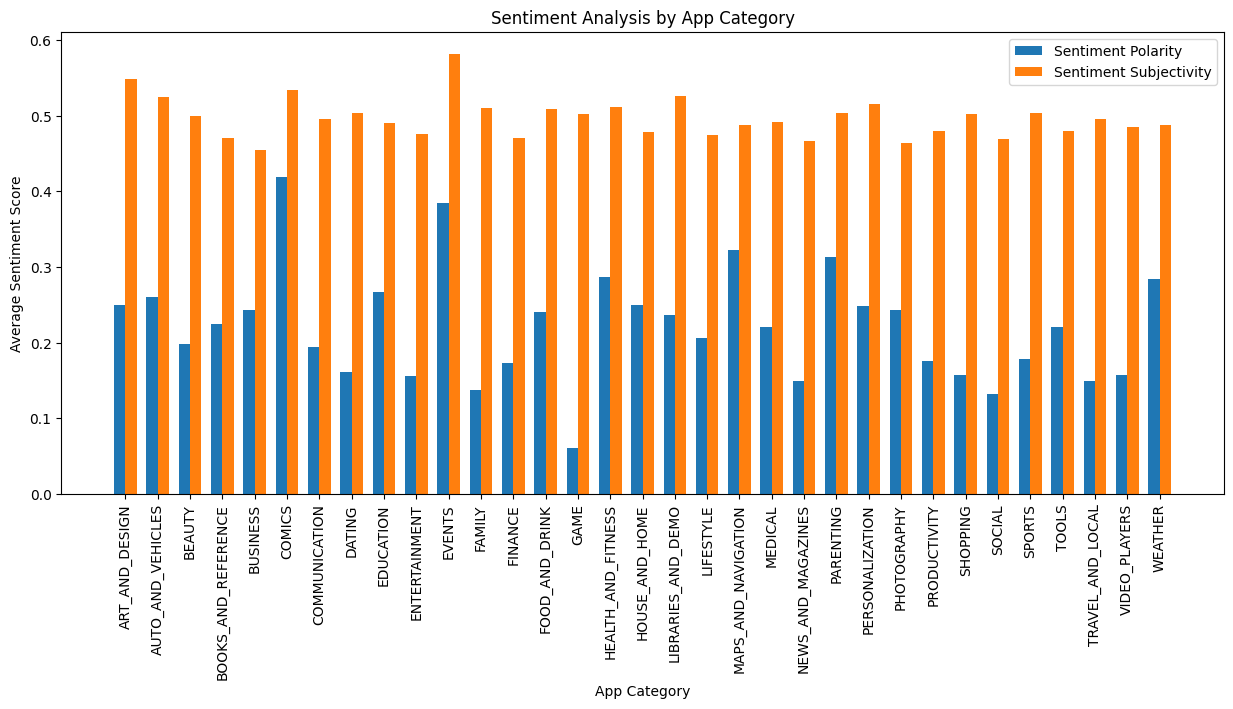

In [555]:
plt.figure(figsize=(15, 6))

x = np.arange(len(category_sentiment['Category']))
bar_width = 0.35

plt.bar(x, category_sentiment['Avg_Sentiment_Polarity'], width=bar_width, label='Sentiment Polarity')
plt.bar(x + bar_width, category_sentiment['Avg_Sentiment_Subjectivity'], width=bar_width, label='Sentiment Subjectivity')

plt.xlabel('App Category')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by App Category')
plt.xticks(x + bar_width/2, category_sentiment['Category'], rotation=90)
plt.legend()

plt.show()

##### 1. Why did you pick the specific chart?

I picked the grouped bar chart because it allows a direct comparison of the average sentiment polarity and subjectivity values within each app category. The bars for sentiment polarity and subjectivity are placed side by side, making it easy to compare the values visually.

The use of different colors or patterns for sentiment polarity and subjectivity bars aids in distinguishing between the two aspects.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be derived from the chart are:
1.  The average sentiment subjectivity values (represented by the orange bars) for all app categories are relatively high, ranging between 0.4 and 0.6.

2.  The analyzed apps tend to have a moderate level of subjectivity in user sentiment, as the average sentiment subjectivity values for all categories are relatively high.

3.  The sentiment polarity, which indicates the positivity or negativity of user sentiment, is generally leaning towards the positive side, with most categories having average sentiment polarity values in the range of 0.1 to 0.3.

4.  The 'Event' category stands out with higher average sentiment subjectivity, suggesting that apps in this category may elicit more varied or subjective opinions from users.

5.  The 'Comics' category has the highest average sentiment polarity, indicating a generally positive sentiment expressed by users towards comics-related apps.

6.  On the other hand, the 'Game' category has the lowest average sentiment polarity, suggesting a comparatively less positive sentiment expressed by users towards gaming apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Having insights into average sentiment subjectivity and polarity can help businesses understand how users perceive their apps or services. This understanding can be used to make informed decisions regarding product improvements, marketing strategies, and user engagement initiatives.

2. Knowing that the 'Comics' category has the highest average sentiment polarity suggests that there is a positive sentiment associated with apps in this category. This insight can be valuable for businesses operating in the comics industry as it indicates a potential positive market reception.

3. The 'Event' category stands out with higher average sentiment subjectivity, indicating a diverse range of opinions. This insight can be leveraged by businesses in the events industry to understand user preferences, identify areas of improvement, and tailor their offerings to better meet user expectations.

Negative Growth Implications:
1.  The finding that the 'Game' category has the lowest average sentiment polarity may indicate a comparatively less positive sentiment expressed by users towards gaming apps. This insight could potentially point to challenges in the gaming industry, such as high competition, user dissatisfaction, or other issues that may impact business growth. Businesses operating in this category may need to focus on improving user experiences, addressing customer concerns, or differentiating their offerings to enhance sentiment and drive growth.

#### Chart - 10 (the most common words used in user reviews)

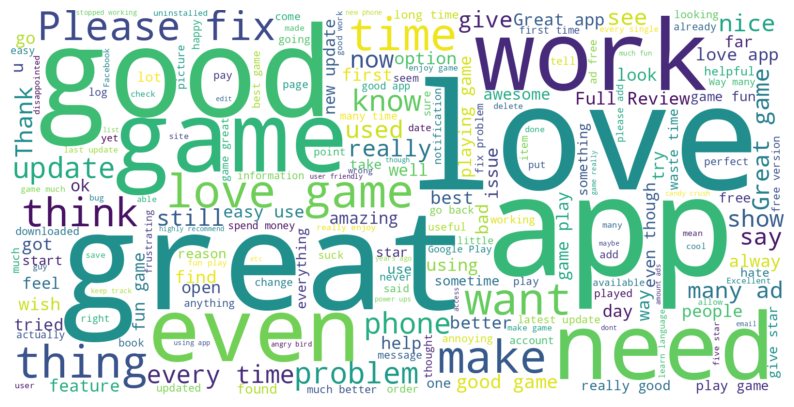

In [556]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

I choose the Word cloud because Word clouds are effective in displaying the relative frequency of words in a visual and intuitive manner. The size of each word in the cloud represents its frequency or importance.

Word clouds provide a quick overview of the most prominent words in a given text or dataset. They allow us to identify patterns and trends in the data at a glance.

In the context of analyzing user reviews, a word cloud can help identify frequently mentioned words or themes that stand out. This can provide valuable insights into what users are talking about the most in their reviews.

##### 2. What is/are the insight(s) found from the chart?

Based on the word cloud with words such as "app," "love," "great," "good," "game," "need," "work," "even," etc., the following insights can be found:

1. The word "app" is one of the largest and most prominent words in the word cloud. This suggests that users frequently mention the term "app" in their reviews, indicating a focus on the overall application experience or functionality.

2. The presence of words like "love," "great," and "good" indicates that users generally have positive sentiments towards the apps. These words suggest that users are satisfied with the apps and express positive emotions when reviewing them.

3. The word "game" stands out, implying that gaming apps might be frequently reviewed or mentioned in user reviews. This suggests that gaming apps are popular among users and often generate feedback or reviews.

4. The word "need" suggests that users express their requirements or expectations in their reviews. This could indicate that users are looking for specific features or improvements in the apps they use.

5. The word "work" indicates that users often mention the performance or functionality of the apps, expressing whether the apps function as expected or if there are any issues or concerns related to their functionality.

Overall, the insights from the word cloud suggest that users generally have positive sentiments toward the apps, frequently mention specific app-related terms, express satisfaction with the apps, and discuss aspects like gaming, requirements, and performance. These insights can be valuable for understanding user preferences and identifying areas for app improvement.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the word cloud can potentially help create a positive business impact in the following ways:

1. The presence of words like "love," "great," and "good" indicates that users generally have positive sentiments towards the apps. This insight suggests that users are satisfied with the apps, which can contribute to positive brand perception, increased user retention, and potential word-of-mouth recommendations. Positive sentiments can also attract new users to try the app based on favorable reviews.

2. By analyzing user reviews, the word cloud provides insights into user expectations and requirements expressed through words like "need" and "work." This information can be valuable for app developers or stakeholders to identify areas of improvement and prioritize feature enhancements or bug fixes. Addressing user concerns and fulfilling their requirements can lead to increased user satisfaction and engagement.

Regarding negative growth, the word cloud analysis might not directly provide insights that lead to negative growth.However, the absence or smaller size of certain positive words compared to negative words in the word cloud could indicate potential issues or concerns expressed in user reviews. 

#### Chart - 11 (Average Ratings for Different Price Ranges)

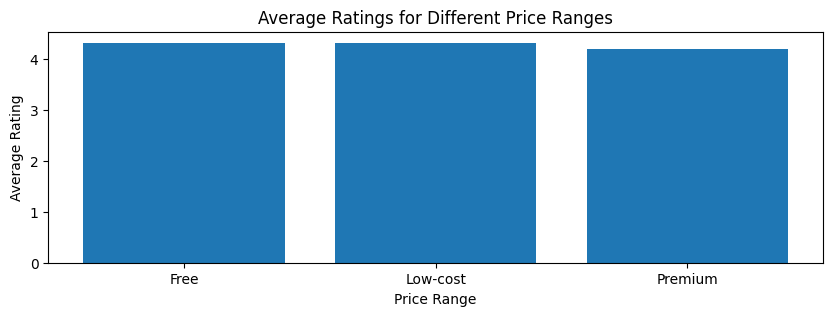

In [557]:
plt.bar(average_ratings.index, average_ratings.values)

plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Different Price Ranges')

plt.show()

##### 1. Why did you pick the specific chart?

I picked the grouped bar chart because a grouped bar plot can effectively compare average ratings across different price ranges. It provides a visual representation of the average ratings for each price range category, allowing for easy comparison and identification of any differences. Each group of bars represents a price range, and the height of each bar represents the average rating.

##### 2. What is/are the insight(s) found from the chart?

The bar plot with average ratings for different price ranges, the following insights can be derived:

1.  The bar plot shows the average ratings for each price range category. The average rating for free apps is 4.32, for low-cost apps is 4.32, and for premium apps is 4.20.

2.  The average ratings for free apps and low-cost apps are very close, with only a slight difference. This suggests that users perceive both free and low-cost apps similarly in terms of quality or satisfaction.

3.  The average rating for premium apps is slightly lower compared to free and low-cost apps. This indicates that users might have higher expectations or specific requirements for apps with premium pricing.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the average ratings across different price ranges can potentially help in creating a positive business impact. Here's the justification:

Positive Business Impact:

1.  Similar Ratings for Free and Low-cost Apps: The insight that free and low-cost apps have similar average ratings suggests that users perceive these two price ranges similarly in terms of quality or satisfaction. This finding can be beneficial for businesses as it indicates that offering low-cost apps can be an effective strategy to attract users while maintaining comparable ratings to free apps. It provides an opportunity for businesses to monetize their apps at a low cost without significantly impacting user satisfaction.

Negative Growth:

There is no specific insight from the given average ratings that directly leads to negative growth.

#### Chart - 12 (App Size vs. Number of Installs)

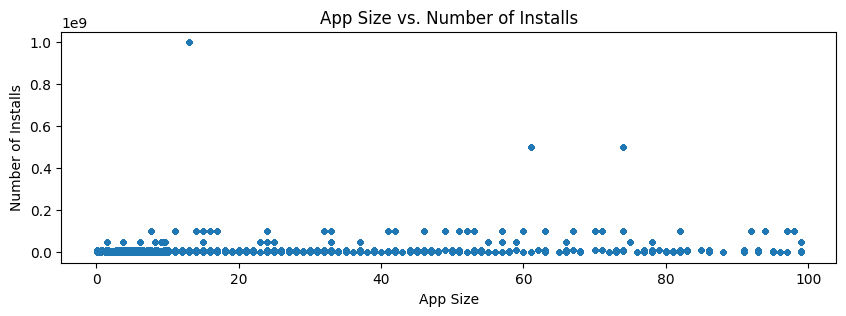

In [568]:
plt.scatter(merged_df['Size'], merged_df['Installs'], s=10)

plt.xlabel('App Size')
plt.ylabel('Number of Installs')
plt.title('App Size vs. Number of Installs')

plt.show()

##### 1. Why did you pick the specific chart?

I choose the scatter plot to visualize the relationship between app size and the number of installations because a scatter plot is suitable for examining the correlation between two continuous variables. In this case, we are interested in exploring how the size of an app (continuous variable) relates to the number of installations it receives (another continuous variable).

##### 2. What is/are the insight(s) found from the chart?

Here are a few possible insights that can be derived from the chart:

1.  The majority of the apps in the dataset have relatively smaller sizes, as indicated by the concentration of dots between 0 and 0.2 on the y-axis. This suggests that a significant number of apps have sizes that fall within this range.

2.  The cluster of dots between 0 and 10 on the x-axis suggests that many apps in the dataset have sizes in this range. This could indicate a common size range that is popular among the apps analyzed.

3.  The presence of only three dots above 0.2 on the y-axis suggests that larger app sizes may have a relatively lower number of installations. It is possible that users tend to prefer smaller-sized apps, resulting in a decline in the number of installations as the app size increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the relationship between app size and the number of installations can potentially have a positive business impact and provide valuable information for decision-making.

Positive Business Impact:

1.  Understanding that smaller app sizes tend to attract more installations can help guide app development and optimization strategies. By prioritizing app size reduction techniques, businesses can create apps that align with user preferences, potentially increasing the likelihood of installations and positive user experiences.

2.  Identifying a popular size range, such as the concentration of apps between 0 and 10 on the x-axis, can highlight a market opportunity. Businesses can focus on developing apps within this size range to target users who prefer apps of that particular size, potentially gaining a competitive advantage.

Negative Growth:

The concentration of dots between 0 and 0.2 on the y-axis could indicate that a significant number of users have limited storage space on their devices. This implies that larger-sized apps might face challenges in gaining installations due to users' storage constraints. Businesses should consider this factor when developing and promoting larger apps, as it could potentially impact growth.

#### Chart - 13 (Average Sentiment Polarity and Subjectivity for Paid and Free Apps)

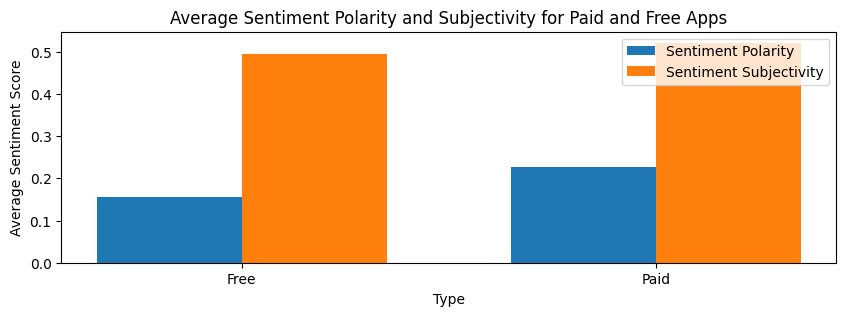

In [570]:
bar_width = 0.35
index = np.arange(len(average_polarity))

plt.bar(index, average_polarity, bar_width, label='Sentiment Polarity')
plt.bar(index + bar_width, average_subjectivity, bar_width, label='Sentiment Subjectivity')

plt.xlabel('Type')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Polarity and Subjectivity for Paid and Free Apps')
plt.xticks(index + bar_width/2, average_polarity.index)

plt.legend()

plt.show()

##### 1. Why did you pick the specific chart?

I picked a grouped bar plot to visualize the differences in sentiment polarity and subjectivity between paid and free apps because it effectively displays and compares multiple categories of data in a single plot.

##### 2. What is/are the insight(s) found from the chart?


Based on the average sentiment polarity and subjectivity scores for paid and free apps, the following insights can be derived:

1.  Higher Polarity for Paid Apps: The average sentiment polarity score for paid apps is higher than that for free apps . This indicates that, on average, paid apps tend to receive more positive sentiment or opinions from users compared to free apps. This insight suggests that users may have a more favorable perception or experience with paid apps.

2.  Similar Subjectivity for Paid and Free Apps: The average sentiment subjectivity score for paid apps is slightly higher than that for free apps. However, the difference is relatively small. This suggests that, on average, both paid and free apps receive similar levels of subjective opinions or sentiments from users. The insight here is that the subjectivity of sentiments expressed by users does not significantly differ between paid and free apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the average sentiment polarity and subjectivity scores for paid and free apps can potentially have both positive and negative implications for business. Here's an analysis of how these insights can impact business:

Positive Business Impact:

1.  The finding that paid apps have higher average sentiment polarity suggests that users tend to express more positive sentiments towards paid apps. This insight can help businesses that offer paid apps to emphasize their positive aspects, such as premium features, enhanced user experience, or exclusive content, to attract more users and potentially increase their revenue.

2.  If the higher sentiment polarity for paid apps is associated with perceived higher quality or value, businesses can use this insight to adjust their pricing strategy. They can consider setting competitive prices that reflect the positive sentiment associated with paid apps, enabling them to capture a segment of the market that values premium offerings.

Negative Growth:

1.  The insight that free apps have lower average sentiment polarity might indicate that users have more negative sentiments towards free apps. This could suggest that users have higher expectations for free apps and may be more critical when expressing their opinions. Businesses offering free apps need to be mindful of this sentiment and ensure that their apps meet user expectations in terms of quality, functionality, and user experience to avoid negative reviews and potential negative growth.

2.  The higher sentiment polarity for paid apps could lead to a perception that free apps are of lower quality or lack value. This perception may discourage users from choosing free apps, potentially impacting their growth and adoption. Businesses offering free apps should focus on demonstrating the value proposition of their apps, such as through innovative features, personalized experiences, or effective monetization strategies, to counter this negative perception.

#### Chart - 14 - Correlation Heatmap

In [560]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [561]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***